In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

In [2]:
# Read the data into a pandas DataFrame
with open('avg_transactions_05-04-2023_14_41_08.txt', 'r') as f:
    data_list = eval(f.read())

In [3]:
# setting date column
data = pd.DataFrame(data_list, columns=['date'])

In [4]:
# Split each string by the comma separator to extract the date and avg_transactions separately
data[['date', 'avg_transactions']] = pd.DataFrame(data['date'].apply(lambda x: x.split(',')).tolist())
# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%m/%Y')
# Convert the 'avg_transactions' column from string to float data type
data['avg_transactions'] = data['avg_transactions'].astype(float)

In [5]:
print(data)

         date  avg_transactions
0  2018-09-01      3.733481e+18
1  2017-06-01      5.678772e+19
2  2015-12-01      2.676410e+19
3  2018-06-01      2.808523e+18
4  2015-08-01      4.805212e+20
5  2018-08-01      2.398951e+18
6  2017-01-01      5.620286e+19
7  2017-09-01      3.437212e+19
8  2017-10-01      2.676152e+19
9  2017-08-01      4.827396e+19
10 2016-07-01      9.577824e+19
11 2016-12-01      6.146659e+19
12 2015-09-01      7.046468e+19
13 2018-10-01      3.070402e+18
14 2018-01-01      1.116457e+19
15 2017-03-01      1.770216e+20
16 2018-12-01      5.944894e+18
17 2016-04-01      2.267063e+19
18 2018-11-01      5.397909e+18
19 2016-06-01      3.049033e+19
20 2016-01-01      6.106607e+19
21 2016-03-01      4.585306e+19
22 2018-03-01      2.728080e+18
23 2017-07-01      6.498146e+19
24 2018-02-01      6.230363e+18
25 2017-02-01      5.558009e+19
26 2016-02-01      6.554761e+19
27 2016-10-01      3.244443e+19
28 2018-07-01      2.274935e+18
29 2015-10-01      7.416932e+19
30 2015-

In [6]:
# Extract month and year from date
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.strftime('%b')

# Specify the order of the months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
cat_type = CategoricalDtype(categories=month_order, ordered=True)
data['month'] = data['month'].astype(cat_type)

# Calculate total transactions per month
monthly_transactions = data.groupby(['year', 'month'])['avg_transactions'].sum().reset_index()

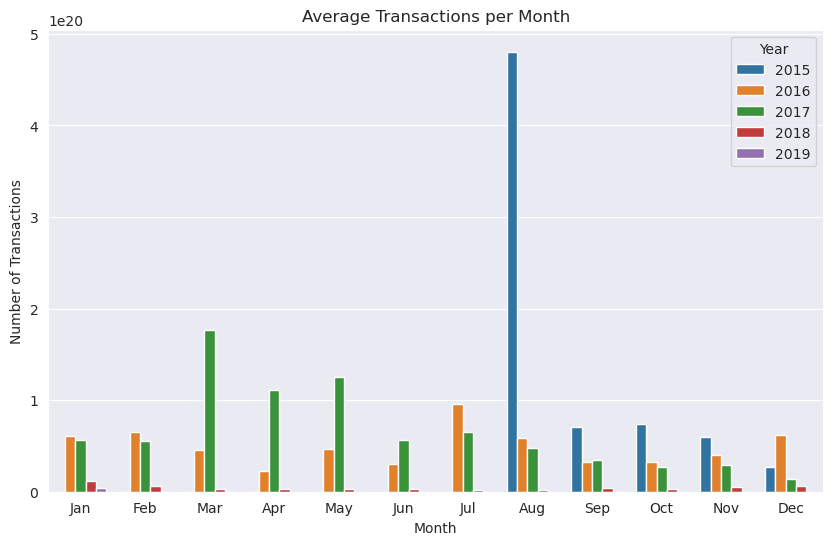

In [7]:
# Create a bar plot
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='avg_transactions', hue='year', data=monthly_transactions)
plt.title('Average Transactions per Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.legend(title='Year')
plt.show()